Eindimensionales Newton-Verfahren
- Ziel: Finde eine Nullstelle $x^{*}$ der stetig differenzierbaren Funktion $f: \mathbb{R} \rightarrow \mathbb{R}$.
- Ansatz: Iteratives Linearisieren und Nullsetzen:
$$
f(x) \approx f\left(x^{(k)}\right)+f^{\prime}\left(x^{(k)}\right)\left(x-x^{(k)}\right)=0 .
$$
- Umstellen liefert die NEWTON-Iteration
$$
x^{(k+1)}:=x^{(k)}-\frac{f\left(x^{(k)}\right)}{f^{\prime}\left(x^{(k)}\right)} .
$$

Mehrdimensionales Newton-Verfahren
- Ziel: Finde eine Nullstelle $\boldsymbol{x}^{*}$ der stetig differenzierbaren Funktion $F: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$.
- Die Ableitung ist gegeben durch die JACOBI-Matrix
$$
J_{F}(\boldsymbol{x}):=\left(\frac{\partial F_{j}(\boldsymbol{x})}{\partial x_{k}}\right)_{j, k=1}^{N}
$$
- Ansatz: Iteratives Linearisieren und Nullsetzen:
$$
F(x) \approx F\left(x^{(k)}\right)+J_{F}\left(x^{(k)}\right)\left(x-x^{(k)}\right)=0 .
$$
- Umstellen liefert die NEWTON-Iteration
$$
\boldsymbol{X}^{(k+1)}:=\boldsymbol{X}^{(k)}-\left(J_{F}\left(\boldsymbol{X}^{(k)}\right)\right)^{-1} F\left(\boldsymbol{X}^{(k)}\right) .
$$
- Numerische Umsetzung:
1. Löse $J_{F}\left(\boldsymbol{x}^{(k)}\right) \Delta \boldsymbol{x}^{(k)}=-F\left(\boldsymbol{x}^{(k)}\right)$.
2. Setze $\boldsymbol{X}^{(k+1)}:=\boldsymbol{X}^{(k)}+\Delta \boldsymbol{x}^{(k)}$.

Abbruchkriterium
- Das Newton-Verfahren wird abgebrochen, sobald
1. die Iteration stagniert, d.h.
$$
\left\|\boldsymbol{x}^{(k)}-\boldsymbol{x}^{(k-1)}\right\|_{2}<\delta,
$$
2. die Funktionswerte verschwinden, d.h.
$$
\left\|F\left(\boldsymbol{X}^{(k)}\right)\right\|_{2}<\epsilon
$$
3. oder die maximale Anzahl an Iterationen erreicht ist, d.h.
$$
k>k .
$$
- Hierbei sind $\delta, \epsilon>0$ und $K \in \mathbb{N}$ geeignete Konstanten.

Die $d$-te Einheitswurzel
- Das NeWTON-Verfahren kann auch auf komplexe differenzierbare Funktionen $f: \mathbb{C} \rightarrow \mathbb{C}$ angewendet werden.
- Ziel: Finde eine $d$-te Einheitswurzel, d.h. eine Lösung von
$$
z^{d}=1 \quad \text { oder } \quad z^{d}-1=0 .
$$
- Die NeWTON-Iteration ist hier
$$
z^{(k+1)}:=z^{(k)}-\frac{\left(z^{(k)}\right)^{d}-1}{d\left(z^{(k)}\right)^{d-1}}=\frac{1}{d}\left((d-1) z^{(k)}+\frac{1}{\left(z^{(k)}\right)^{d-1}}\right) .
$$

Nichtlineare Optimierung
- Ziel: Finde ein Minimum $x^{*}$ der zweimal stetig differenzierbaren Funktion $F: \mathbb{R}^{n} \rightarrow \mathbb{R}$.
- Die ersten beiden Ableitungen sind gegeben durch Gradient und Hesse-Matrix
$$
\nabla F(x):=\left(\frac{\partial F(x)}{\partial x_{k}}\right)_{k=1}^{N} \quad \text { und } \quad H_{F}(x):=\left(\frac{\partial^{2} F_{j}(x)}{\partial x_{j} \partial x_{k}}\right)_{j, k=1}^{N}
$$
- Wende das Newton-Verfahren auf den Gradienten an:
$$
\nabla F(x) \approx \nabla F\left(x^{(k)}\right)+H_{F}\left(x^{(k)}\right)\left(x-x^{(k)}\right)=0 .
$$
- Umstellen liefert die Newton-Iteration
$$
\boldsymbol{x}^{(k+1)}:=\boldsymbol{x}^{(k)}-\left(H_{F}\left(\boldsymbol{X}^{(k)}\right)\right)^{-1} \nabla F\left(\boldsymbol{X}^{(k)}\right) .
$$
- Numerische Umsetzung:
1. Löse $H_{F}\left(x^{(k)}\right) \Delta x^{(k)}=-\nabla F\left(x^{(k)}\right)$.
2. Setze $\boldsymbol{x}^{(k+1)}:=\boldsymbol{x}^{(k)}+\Delta \boldsymbol{x}^{(k)}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Aufgabe 4.1
def newton(F, dF, x0, delta=10**-4, epsilon=10**-4, maxIter=100):
    xk = x0
    for i in range(maxIter):

        Fxk = F(xk) # I swear I'm not trying to spell a certain curse word
        dFxk = dF(xk)

        if len(x0) == 1: # Can't use linalg.solve if it's 1d
            deltaxk = np.array([-Fxk/dFxk])
        else:
            deltaxk = np.linalg.solve(dFxk, -Fxk)
        xkplus1 = xk + deltaxk

        if np.linalg.norm(xkplus1 - xk) < delta:
            # print("Die Iteration stagniert, das Newton-Verfahren wird abgebrochen.")
            return xkplus1

        if np.linalg.norm(F(xkplus1)) < epsilon:
            # print("Die Funktionswerte verschwinden, das Newton-Verfahren wird abgebrochen.")
            return xkplus1

        xk = xkplus1

    # print("Die maximale Anzahl an Iterationen ist erreicht, das Newton-Verfahren wird abgebrochen.")
    return xk

#Aufgabe 4.2
def F2(x: np.array) -> np.array:
    f = lambda x: x**3 - 2*x
    Fx = f(x[0])
    return np.array(Fx)

def dF2(x: np.array) -> np.array:
    f = lambda x: 3*x**2 - 2
    Fx = f(x[0])
    return np.array(Fx)

#Aufgabe 4.3
def F3(x: np.array) -> np.array:
    f1 = lambda x1, x2: x1**2 + x2**2 - 6*x1
    f2 = lambda x1, x2: 3/4 * np.exp(-x1) - x2
    F = [f1, f2]
    Fx = [f(x[0], x[1]) for f in F]
    return np.array(Fx).T

def dF3(x: np.array) -> np.array:
    (x1, x2) = x
    return np.array([[2*x1 - 6, 2*x2], [-3/4*np.exp(-x1), -1]])

#Aufgabe 4.4
def discrete_b_set(x_left=-1, x_right=1, y_top=1, y_bottom=-1, x_size=512, y_size=512):
    x = np.linspace(x_left, x_right, x_size)
    y = np.linspace(y_top, y_bottom, y_size)
    xv, yv = np.meshgrid(x, y)
    B = xv + 1j*yv
    return B

def F4(x: np.array) -> np.array:
    f = lambda x: x**3 - 1
    Fx = f(x[0])
    return np.array(Fx)

def dF4(x: np.array) -> np.array:
    f = lambda x: 3*x**2
    Fx = f(x[0])
    return np.array(Fx)

def color_code_root(x):
    '''
    Map a number to the color of one of 3 roots by calculating the distance and pick the closest one
    '''
    r1 = np.absolute(x - 1)
    r2 = np.absolute(x - (-1/2 + 0.866j))
    r3 = np.absolute(x - (1/2 - 0.866j))
    data = [((53,42,135), r1), ((49,176,154), r2), ((249,251,14), r3)]
    data.sort(key=lambda x:x[1])
    return data[0]

#Aufgabe 4.5
def F5(x: np.array) -> np.array:
    f = lambda x: x**5 - 1
    Fx = f(x[0])
    return np.array(Fx)

def dF5(x: np.array) -> np.array:
    f = lambda x: 5*x**4
    Fx = f(x[0])
    return np.array(Fx)

#Aufgabe 4.6
def divF6(x: np.array) -> np.array:
    f1 = lambda x1, x2: 4*(x1+1)**3
    f2 = lambda x1, x2: 4*(x2-1)**3
    F = [f1, f2]
    Fx = [f(x[0], x[1]) for f in F]
    return np.array(Fx).T

def HF6(x: np.array) -> np.array:
    (x1, x2) = x
    return np.array([[12*(x1+1)**2, 0], [0, 12*(x2-1)**2]])

#Aufgabe 4.7
def mandelbrot(c, max_iter):
    z = c
    i = 0
    
    while np.absolute(z)<=2 and i < max_iter:
        z = z**2 + c
        i += 1
    return i

In [10]:
# Aufgabe 4.2: Solve R -> R equation
print("Aufgabe 4.2")
r1 = newton(F2, dF2, np.array([1]), 10**-10, 10**-10, 50)
r2 = newton(F2, dF2, np.array([0]), 10**-10, 10**-10, 50)
r3 = newton(F2, dF2, np.array([2]), 10**-10, 10**-10, 50)
r4 = newton(F2, dF2, np.array([-2]), 10**-10, 10**-10, 50)
print(r1)
print(r2)
print(r3)
print(r4)

Aufgabe 4.2
[1.41421356]
[0.]
[1.41421356]
[-1.41421356]


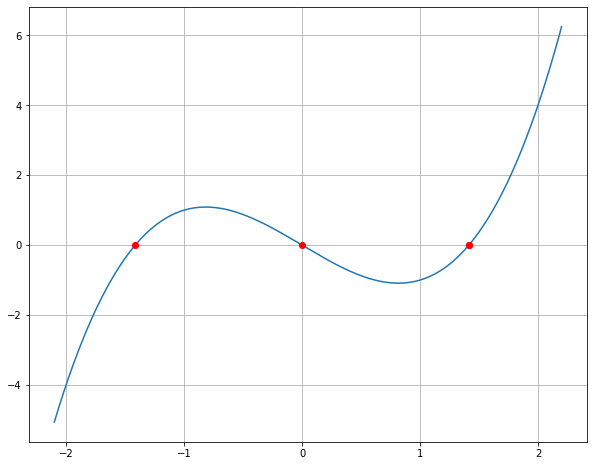

In [36]:
ax = np.arange(-2.1, 2.2, 0.01)
f2 = [x**3 - 2*x for x in ax]
roots = [r1,r2,r3,r4]
roots_f2 = [x**3 - 2*x for x in roots]
plt.figure(figsize = (10,8))
plt.grid()
plt.plot(ax, f2)
plt.plot(roots, roots_f2, 'ro')

In [3]:
# Aufgabe 4.3: Solve R^2 -> R^2 equations
print("Aufgabe 4.3")
print(newton(F3, dF3, np.array([0.08, 0.7])))

Aufgabe 4.3
[0.08083301 0.69176054]


Aufgabe 4.4


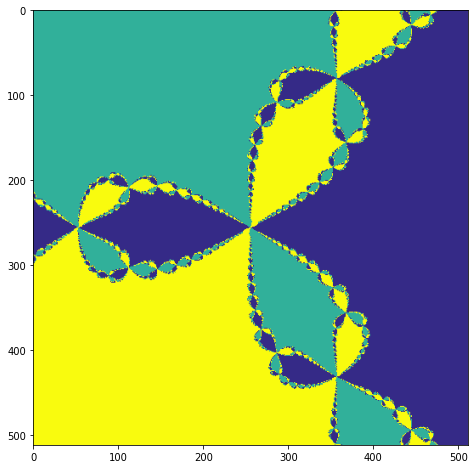

In [4]:
# Aufgabe 4.4
print("Aufgabe 4.4")
B = discrete_b_set()
Bf = B.flatten()
F4result = [np.around(newton(F4, dF4, np.array([x]), 10**-5, 10**-5, 15)[0],2) for x in Bf]
colormap = [color_code_root(x)[0] for x in F4result]
F4img = np.reshape(colormap, (512, 512, 3))
plt.figure(figsize = (20,8))
plt.imshow(F4img)

In [5]:
print("Aufgabe 4.5")
def aufgabe5(iteration):
    F5result = [newton(F5, dF5, np.array([x]), 10**-14, 10**-14, iteration)[0] for x in Bf]
    F5phase = [np.angle(z) for z in F5result]
    F5phase_min_abs = abs(min(F5phase))
    F5phase_max = max(F5phase)
    F5mapcolor = [int((F5phase_min_abs + x) / (F5phase_min_abs + F5phase_max) * 255) for x in F5phase]
    F5img = np.reshape(F5mapcolor, (512, 512))
    plt.figure(figsize = (20,8))
    plt.imshow(F5img, cmap='jet', interpolation='nearest')

Aufgabe 4.5


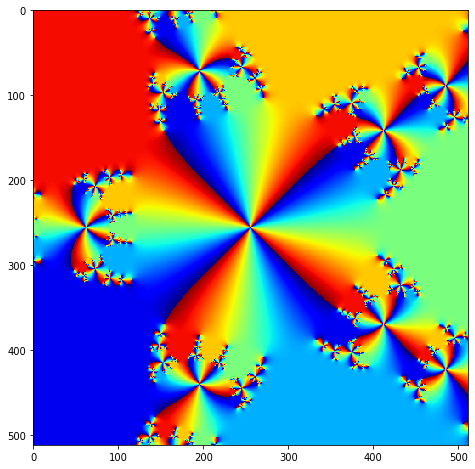

In [6]:
aufgabe5(5)

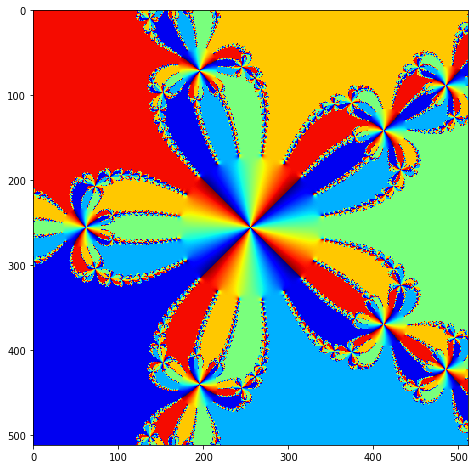

In [7]:
aufgabe5(15)

In [8]:
# Aufgabe 4.6
print("Aufgabe 4.6")
print(newton(divF6, HF6, np.array([-1.1, 1.1])))

Aufgabe 4.6
[-1.01975309  1.01975309]


Aufgabe 4.7


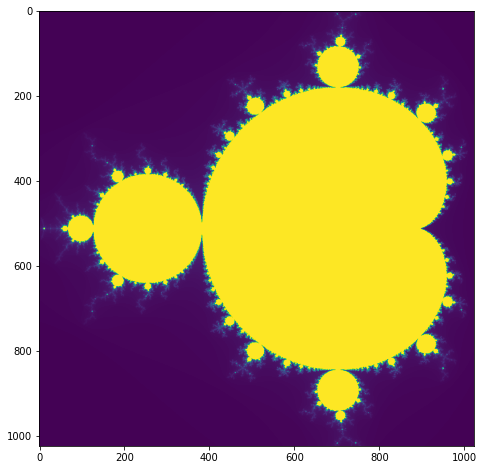

In [9]:
# Aufgabe 4.7
print("Aufgabe 4.7")
MB = discrete_b_set(-1.5, 0.5, 1, -1, 1024, 1024)
MBf = MB.flatten()
Mresult = [mandelbrot(c, 256) for c in MBf]
Mimg = np.reshape(Mresult, (1024, 1024))
plt.figure(figsize = (20,8))
plt.imshow(Mimg)